## Inputs

In [1]:
to_hit_bonus = 8
attack_dice = '2d6'
damage_bonus = 5

t = True
f = False

with_advantage = f
with_disadvantage = f

num_trials = 5_000_000

## Output

In [2]:
import random
import re
import numpy as np

In [3]:
# regex to extract number of damage dice and value of damage dice into variables
number_atk_dice = int(re.search(r'^(\d)d(\d)$', attack_dice).group(1))
atk_dice_face = int(re.search(r'^(\d)d(\d)$', attack_dice).group(2))

In [4]:
def normal_attack(n, enemy_ac, adv=False, dis=False):
    if (adv == False and dis == False) or (adv == True and dis == True):
        to_hit = np.random.randint(1, high=21, size=n) + to_hit_bonus
        crit_mask = to_hit == 20 + to_hit_bonus
        enemy_ac_array = np.zeros(n) + enemy_ac
        is_hit = to_hit >= enemy_ac_array
        is_hit = np.any([is_hit, crit_mask], axis=0)
        damage_die_num = 0
        tot_damage_roll = np.zeros(n)
        tot_crit_roll = np.zeros(n)
        while damage_die_num < number_atk_dice: # Regular damage
            damage_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_damage_roll += damage_roll
            damage_die_num += 1
        damage_die_num = 0
        while damage_die_num < number_atk_dice: # Crit damage
            crit_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_crit_roll += crit_roll
            damage_die_num += 1
        tot_damage_roll = tot_damage_roll + damage_bonus
        tot_crit_roll = tot_crit_roll * crit_mask
        final_damage = tot_damage_roll + tot_crit_roll
        average_damage = np.sum(final_damage * is_hit) / n

    if adv == True and dis == False:
        roll1 = np.random.randint(1, high=21, size=n)
        roll2 = np.random.randint(1, high=21, size=n)
        first_roll_high = roll1 > roll2
        second_roll_high = 1 - first_roll_high
        final_roll = (roll1 * first_roll_high) + (roll2 * second_roll_high)
        to_hit = final_roll + to_hit_bonus
        crit_mask = to_hit == 20 + to_hit_bonus
        enemy_ac_array = np.zeros(n) + enemy_ac
        is_hit = to_hit >= enemy_ac_array
        is_hit = np.any([is_hit, crit_mask], axis=0)
        damage_die_num = 0
        tot_damage_roll = np.zeros(n)
        tot_crit_roll = np.zeros(n)
        while damage_die_num < number_atk_dice:
            damage_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_damage_roll += damage_roll
            damage_die_num += 1
        damage_die_num = 0
        while damage_die_num < number_atk_dice: # Crit damage
            crit_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_crit_roll += crit_roll
            damage_die_num += 1
        tot_damage_roll = tot_damage_roll + damage_bonus
        tot_crit_roll = tot_crit_roll * crit_mask
        final_damage = tot_damage_roll + tot_crit_roll
        average_damage = np.sum(final_damage * is_hit) / n

    if adv == False and dis == True:
        roll1 = np.random.randint(1, high=21, size=n)
        roll2 = np.random.randint(1, high=21, size=n)
        first_roll_high = roll1 > roll2
        second_roll_high = 1 - first_roll_high
        final_roll = (roll1 * (1 - first_roll_high)) + (roll2 * (1 - second_roll_high))
        to_hit = final_roll + to_hit_bonus
        crit_mask = to_hit == 20 + to_hit_bonus
        enemy_ac_array = np.zeros(n) + enemy_ac
        is_hit = to_hit >= enemy_ac_array
        is_hit = np.any([is_hit, crit_mask], axis=0)
        damage_die_num = 0
        tot_damage_roll = np.zeros(n)
        tot_crit_roll = np.zeros(n)
        while damage_die_num < number_atk_dice:
            damage_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_damage_roll += damage_roll
            damage_die_num += 1
        damage_die_num = 0
        while damage_die_num < number_atk_dice: # Crit damage
            crit_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_crit_roll += crit_roll
            damage_die_num += 1
        tot_damage_roll = tot_damage_roll + damage_bonus
        tot_crit_roll = tot_crit_roll * crit_mask
        final_damage = tot_damage_roll + tot_crit_roll
        average_damage = np.sum(final_damage * is_hit) / n

    return average_damage

def sharpshooter_attack(n, enemy_ac, adv=False, dis=False):
    if (adv == False and dis == False) or (adv == True and dis == True):
        to_hit = np.random.randint(1, high=21, size=n) + to_hit_bonus - 5
        crit_mask = to_hit == 20 + to_hit_bonus - 5
        enemy_ac_array = np.zeros(n) + enemy_ac
        is_hit = to_hit >= enemy_ac_array
        is_hit = np.any([is_hit, crit_mask], axis=0)
        damage_die_num = 0
        tot_damage_roll = np.zeros(n)
        tot_crit_roll = np.zeros(n)
        while damage_die_num < number_atk_dice: # Regular damage
            damage_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_damage_roll += damage_roll
            damage_die_num += 1
        damage_die_num = 0
        while damage_die_num < number_atk_dice: # Crit damage
            crit_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_crit_roll += crit_roll
            damage_die_num += 1
        tot_damage_roll = tot_damage_roll + damage_bonus
        tot_crit_roll = tot_crit_roll * crit_mask
        final_damage = tot_damage_roll + tot_crit_roll + 10
        average_damage = np.sum(final_damage * is_hit) / n

    if adv == True and dis == False:
        roll1 = np.random.randint(1, high=21, size=n)
        roll2 = np.random.randint(1, high=21, size=n)
        first_roll_high = roll1 > roll2
        second_roll_high = 1 - first_roll_high
        final_roll = (roll1 * first_roll_high) + (roll2 * second_roll_high)
        to_hit = final_roll + to_hit_bonus - 5
        crit_mask = to_hit == 20 + to_hit_bonus - 5
        enemy_ac_array = np.zeros(n) + enemy_ac
        is_hit = to_hit >= enemy_ac_array
        is_hit = np.any([is_hit, crit_mask], axis=0)
        damage_die_num = 0
        tot_damage_roll = np.zeros(n)
        tot_crit_roll = np.zeros(n)
        while damage_die_num < number_atk_dice:
            damage_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_damage_roll += damage_roll
            damage_die_num += 1
        damage_die_num = 0
        while damage_die_num < number_atk_dice: # Crit damage
            crit_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_crit_roll += crit_roll
            damage_die_num += 1
        tot_damage_roll = tot_damage_roll + damage_bonus + 10
        tot_crit_roll = tot_crit_roll * crit_mask
        final_damage = tot_damage_roll + tot_crit_roll
        average_damage = np.sum(final_damage * is_hit) / n

    if adv == False and dis == True:
        roll1 = np.random.randint(1, high=21, size=n)
        roll2 = np.random.randint(1, high=21, size=n)
        first_roll_high = roll1 > roll2
        second_roll_high = 1 - first_roll_high
        final_roll = (roll1 * (1 - first_roll_high)) + (roll2 * (1 - second_roll_high))
        to_hit = final_roll + to_hit_bonus - 5
        crit_mask = to_hit == 20 + to_hit_bonus - 5
        enemy_ac_array = np.zeros(n) + enemy_ac
        is_hit = to_hit >= enemy_ac_array
        is_hit = np.any([is_hit, crit_mask], axis=0)
        damage_die_num = 0
        tot_damage_roll = np.zeros(n)
        tot_crit_roll = np.zeros(n)
        while damage_die_num < number_atk_dice:
            damage_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_damage_roll += damage_roll
            damage_die_num += 1
        damage_die_num = 0
        while damage_die_num < number_atk_dice: # Crit damage
            crit_roll = np.random.randint(1, high=atk_dice_face + 1, size=n)
            tot_crit_roll += crit_roll
            damage_die_num += 1
        tot_damage_roll = tot_damage_roll + damage_bonus + 10
        tot_crit_roll = tot_crit_roll * crit_mask
        final_damage = tot_damage_roll + tot_crit_roll
        average_damage = np.sum(final_damage * is_hit) / n

    return average_damage

### Average Damage of a Normal Sauce Attack

In [5]:
ac_list = list(range(8,26))
norm_avg_dam_list = []
for ac in ac_list:
    avg_dam = normal_attack(num_trials, ac, with_advantage, with_disadvantage)
    norm_avg_dam_list.append(avg_dam)
norm_paired_list = list(zip(ac_list, norm_avg_dam_list))
norm_dam_array = np.array(norm_avg_dam_list)
norm_paired_list

[(8, 12.3477654),
 (9, 12.3493582),
 (10, 11.7488912),
 (11, 11.1490302),
 (12, 10.549915),
 (13, 9.9509732),
 (14, 9.3470874),
 (15, 8.746777),
 (16, 8.1503588),
 (17, 7.5510758),
 (18, 6.9512314),
 (19, 6.3456478),
 (20, 5.750602),
 (21, 5.1481024),
 (22, 4.5543474),
 (23, 3.9517484),
 (24, 3.3497066),
 (25, 2.7494336)]

### Average Damage of a Sharpshooter Sauce Attack

In [6]:
shrp_avg_dam_list = []
for ac in ac_list:
    avg_dam = sharpshooter_attack(num_trials, ac, with_advantage, with_disadvantage)
    shrp_avg_dam_list.append(avg_dam)
shrp_paired_list = list(zip(ac_list, shrp_avg_dam_list))
shrp_dam_array = np.array(shrp_avg_dam_list)
shrp_paired_list

[(8, 17.952231),
 (9, 16.8523814),
 (10, 15.753),
 (11, 14.6511974),
 (12, 13.5447416),
 (13, 12.4569476),
 (14, 11.3516298),
 (15, 10.256172),
 (16, 9.1537138),
 (17, 8.0535104),
 (18, 6.9426068),
 (19, 5.8450614),
 (20, 4.7541784),
 (21, 3.6441614),
 (22, 2.5549826),
 (23, 1.4538054),
 (24, 1.448973),
 (25, 1.4495228)]

### "Should I use a sharpshooter attack?" This cell tells you the answer!

In [7]:
use_sharpshooter_arr = shrp_dam_array >= norm_dam_array
ac_arr = np.array(ac_list)
paired_arr = np.stack((ac_arr, use_sharpshooter_arr), axis=1)
paired_arr


array([[ 8,  1],
       [ 9,  1],
       [10,  1],
       [11,  1],
       [12,  1],
       [13,  1],
       [14,  1],
       [15,  1],
       [16,  1],
       [17,  1],
       [18,  0],
       [19,  0],
       [20,  0],
       [21,  0],
       [22,  0],
       [23,  0],
       [24,  0],
       [25,  0]])

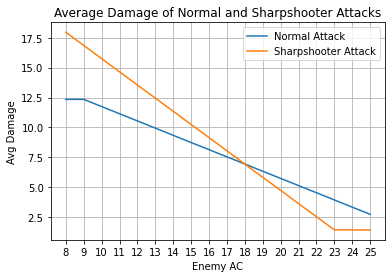

In [8]:
import matplotlib.pyplot as plt

plt.plot(ac_list, norm_avg_dam_list, ac_list, shrp_avg_dam_list)
plt.xlabel('Enemy AC')
plt.ylabel('Avg Damage')
plt.title('Average Damage of Normal and Sharpshooter Attacks')
plt.xticks(ac_list)
plt.grid()
plt.legend(['Normal Attack', 'Sharpshooter Attack'])
# All set!